# Titanic Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
%matplotlib inline
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_df = pd.read_csv('gender_submission.csv')

In [3]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Explore our data

explore all the available features:

In [5]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


#### Observations:

numerical features: PassengerID, Age(float), SibSp(# of siblings/spouse), Parch(# of parents/children), Fare(ticket fare) 

categorical features: Pclass(Ordinal), Sex, Embarked(Port of embarkation).

In [6]:
train_df.info()
print('-'*50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

#### Missing values
We can see the number of missing data of Cabin in both case is high, and Age also has some missing data. There's also a missing data for Fare in our test set and two missing data for Embarked in train set.

1. Missing data in train set: Cabin, Age, Embarked

2. Missing data in test set: Cabin, Age, Fare

#### Drop features:

1. Because of the high missing volume, Cabin could be dropped from our feature collection.

2. Few other features may also be dropped, which includes PassengerID, Name, Ticket because they are not contribuing to the survival of a passenger.

#### Fill in the missing values: 

1. Fill in the missing Age variable because it significantly correlates to our survival result.

2. Fill in the Embarked variable using the mode of embarked variable

#### Possible feature creation: 

1. construct a Age bands to convert the age attribute into a categorical variable.

2. construct Fare intervals to convert the fare attribute into a categorical variable.

3. combine the sibsp variable and parch variable to construct a variable showing the total family member onboard.

4. Extract the title of passengers from their name.

#### few assumptions to have in mind:

1. women and children are more likely to survive

2. upper-class passenger are more likely to survive, or put it another way, high fares could lead to survival. 

### Group by categorical features

To Confirm some of our guesses, we can group by sex, pclass, embarked and family members to see their survival rate.

In [7]:
train_df.groupby('Pclass')['Survived'].mean().sort_values(ascending = False)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [8]:
train_df.groupby('Sex')['Survived'].mean().sort_values(ascending = False)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [9]:
train_df.groupby('Embarked')['Survived'].mean().sort_values(ascending = False)

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [10]:
train_df.groupby('Parch')['Survived'].mean().sort_values(ascending = False)

Parch
3    0.600000
1    0.550847
2    0.500000
0    0.343658
5    0.200000
6    0.000000
4    0.000000
Name: Survived, dtype: float64

In [11]:
train_df.groupby('SibSp')['Survived'].mean().sort_values(ascending=False)

SibSp
1    0.535885
2    0.464286
0    0.345395
3    0.250000
4    0.166667
8    0.000000
5    0.000000
Name: Survived, dtype: float64

In [12]:
train_df['Family'] = train_df['SibSp']+train_df['Parch']

#### Observations:

From the above result, we can see that female, C port embarkation and upper class passenger are more likely to survive, which is what we expected. However, it seems like the number of family members does not have any influence on one's survival. 

### Visualize the numerical variable against the survival result

To confirm our assumption, plot different age and fare against the survival rate.

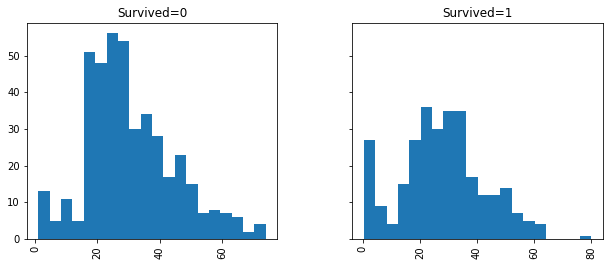

In [13]:
fig = train_df.hist(column='Age', 
              by='Survived', 
              bins=20, grid=True, 
              figsize=(10,4), 
              sharey=True, 
              color=next(color_cycle))

for col in range(2):
    fig[col].set_title(f'Survived={col}')

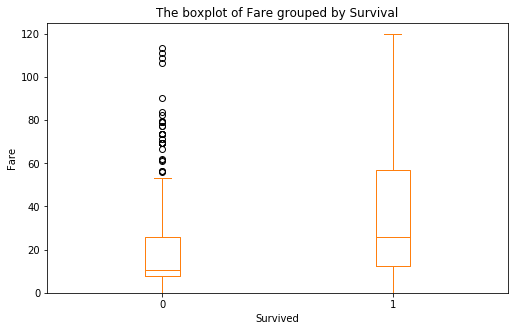

In [14]:
train_df.boxplot(column='Fare',
                 by='Survived', 
                 figsize=(8,5), 
                 grid=False, 
                 color=next(color_cycle))
plt.ylim(0, 125) #which includes most of the fares paid
plt.ylabel('Fare')
plt.suptitle('')
plt.title('The boxplot of Fare grouped by Survival')
plt.show()

#### Observations:

From the above plots, since we divided the range of Age into 20 bins, we can see that children who has an age<4 are more likely to survive. The fare also seems have some influence on survival rate since the graph shows that the people who survived pays higher fare than those whose fare are low.

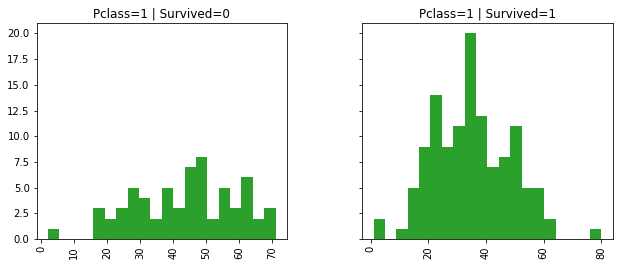

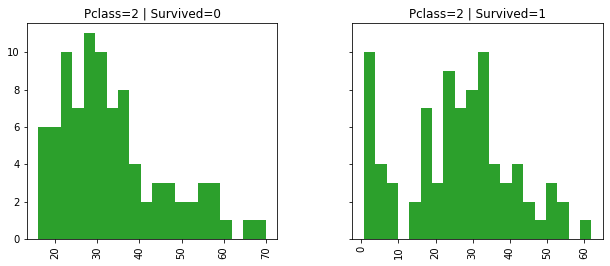

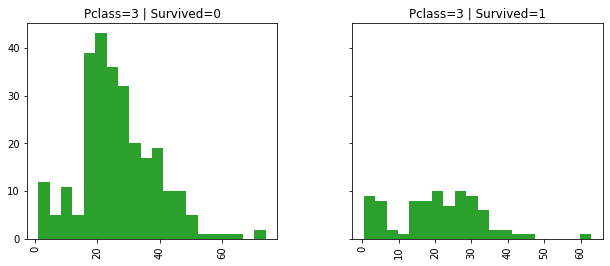

In [15]:
fig = train_df.groupby('Pclass').hist(column='Age', 
                                by='Survived', 
                                bins=20, 
                                figsize=(10,4), 
                                sharey=True,
                                color=next(color_cycle))

for row in range(3):
    for col in range(2):
        pclass = 3-row
        fig[pclass][col].set_title(f'Pclass={pclass} | Survived={col}')

#### Observations:

From the above plots, we can clearly see that most passengers survived in pclass 1, and about half of the passengers survived in pclass 2, which includes all the children. However, in pclass 3, most passengers did not survive.

### Staged Sum up:

1. Variables that will be included in our model: 
        Categorical: Sex, Embarked, Pclass
        Numerical: Age, Fare
2. Things to do next:
        1. Drop other features that have too much missing data or do not have influence on our goal attribute.
        2. Extract title feature from Name attribute.
        3. Complete the missing data for Age, Fare and Embarked.
        4. Convert the categorical features into numerical expression.
        4. Grouped Age and Fare into Bands

#### Drop features from both Train and Test set (PassengerID, Ticket, Cabin)

In [16]:
train = train_df.drop(columns=['PassengerId', 'Ticket', 'Cabin'])
test = test_df.drop(columns=['PassengerId', 'Ticket', 'Cabin'])
print(f"After dropping irrelevant features, train set shape: {train.shape}, test set shape: {test.shape}")
print(f"train set features: {train.columns.values}")
print(f"test set features: {test.columns.values}")

After dropping irrelevant features, train set shape: (891, 10), test set shape: (418, 8)
train set features: ['Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked'
 'Family']
test set features: ['Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked']


#### Extract title from Name attribute (Mr, Mrs, Miss...)

In [17]:
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract('([A-Za-z]+)\.', expand=False )

In [18]:
total = pd.concat([train, test])
total['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [19]:
title_count = total.groupby('Title')['Name'].count()
title_count

Title
Capt          1
Col           4
Countess      1
Don           1
Dona          1
Dr            8
Jonkheer      1
Lady          1
Major         2
Master       61
Miss        260
Mlle          2
Mme           1
Mr          757
Mrs         197
Ms            2
Rev           8
Sir           1
Name: Name, dtype: int64

In [20]:
train['Title'] = train['Title'].replace(to_replace = ['Don', 'Rev', 'Dr','Major', 'Col', 'Capt', 'Countess', 'Jonkheer', 'Dona'], value='Others') \
                            .replace(to_replace = ['Lady', 'Mlle', 'Ms'], value='Miss') \
                            .replace(to_replace = 'Mme', value='Mrs') \
                            .replace(to_replace = 'Sir', value='Mr')

test['Title'] = test['Title'].replace(to_replace = ['Don', 'Rev', 'Dr','Major', 'Col', 'Capt', 'Countess', 'Jonkheer', 'Dona'], value='Others') \
                            .replace(to_replace = ['Lady', 'Mlle', 'Ms'], value='Miss') \
                            .replace(to_replace = 'Mme', value='Mrs') \
                            .replace(to_replace = 'Sir', value='Mr')

total['Title'] = total['Title'].replace(to_replace = ['Don', 'Rev', 'Dr','Major', 'Col', 'Capt', 'Countess', 'Jonkheer', 'Dona'], value='Others') \
                            .replace(to_replace = ['Lady', 'Mlle', 'Ms'], value='Miss') \
                            .replace(to_replace = 'Mme', value='Mrs') \
                            .replace(to_replace = 'Sir', value='Mr')

In [21]:
train.groupby('Title')['Survived'].mean().sort_values(ascending=False)

Title
Mrs       0.793651
Miss      0.704301
Master    0.575000
Others    0.285714
Mr        0.158301
Name: Survived, dtype: float64

In [22]:
train = train.drop(columns='Name')
test = test.drop(columns='Name')
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title
0,0,3,male,22.0,1,0,7.2500,S,1,Mr
1,1,1,female,38.0,1,0,71.2833,C,1,Mrs
2,1,3,female,26.0,0,0,7.9250,S,0,Miss
3,1,1,female,35.0,1,0,53.1000,S,1,Mrs
4,0,3,male,35.0,0,0,8.0500,S,0,Mr


#### Observation:

We can see female passengers with a title of Mrs and Miss are more likely to survive. With title, it's safe to drop the Name column because it has no further use for us. Knowing the man's name can not help us predicting his survival.

#### Fill in the missing values for Age and Embarked

There could be some correlation between Pclass and Age. People in higher class are probably older, let's see whether this is the case.

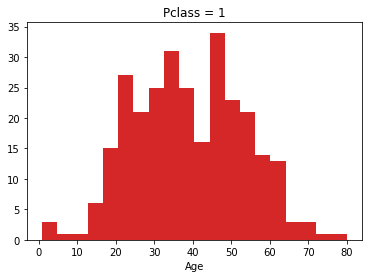

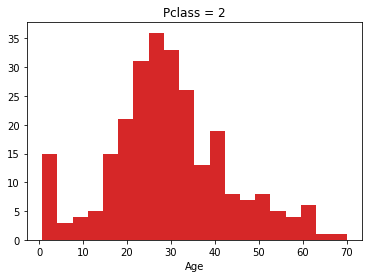

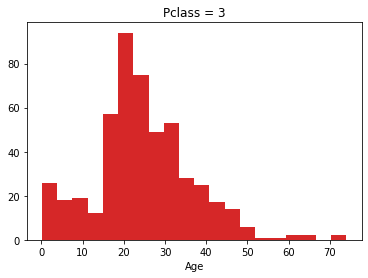

In [23]:
fig = total.groupby('Pclass').hist(column="Age",
                             bins = 20,
                             grid=False,
                             sharex=True,
                             color=next(color_cycle))
pclass = 1
for col in range(1,4):
    fig[col][0][0].set_title(f'Pclass = {pclass}') 
    fig[col][0][0].set_xlabel('Age')
    pclass+=1

#### Observation: 

It's clear to see that the age distributions in three classes are different, so it makes more sense to generate the missing age based on their pclass information. We can use the median in each class to replace the null value.

In [24]:
replace_values = total.groupby('Pclass')['Age'].median()
replace_values

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [25]:
for i in range(1, 4):
    train.loc[(train['Age'].isnull()) & (train['Pclass'] == i), 'Age'] = replace_values[i]
    test.loc[(test['Age'].isnull()) & (test['Pclass'] == i), 'Age'] = replace_values[i]

In [26]:
print(train.info())
print('-'*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Family    891 non-null    int64  
 9   Title     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 

Until now, we have fill in all the null values in our Age attribute. Because there's only one missing value for Fare and two missing value for Embarked, let's use the median to fill in the Fare because the distribution of fare (graph below) is strongly right skewed, the mean will seriously affected by the outliers. We will use the mode to fill in the Embarked variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DBC4C7E888>]],
      dtype=object)

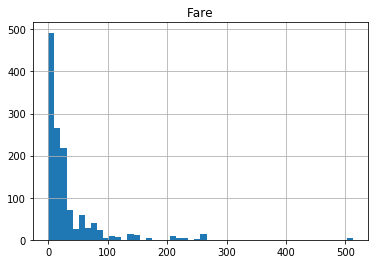

In [27]:
total.hist(column='Fare', bins=50)

In [28]:
replace_embarked = total['Embarked'].mode()
train['Embarked'] = train['Embarked'].fillna(value=replace_embarked[0])

replace_fare = total['Fare'].median()
test.loc[test['Fare'].isnull(), 'Fare'] = replace_fare

In [29]:
print(train.info())
print('-'*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Family    891 non-null    int64  
 9   Title     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 

Now, we have completed our missing data, and next we are going to convert the strings in Sex variable to numerical values.

In [30]:
train['Sex'] = train['Sex'].map({'female':1, 'male':0})
test['Sex'] = test['Sex'].map({'female':1, 'male':0})

In [31]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title
0,0,3,0,22.0,1,0,7.2500,S,1,Mr
1,1,1,1,38.0,1,0,71.2833,C,1,Mrs
2,1,3,1,26.0,0,0,7.9250,S,0,Miss
3,1,1,1,35.0,1,0,53.1000,S,1,Mrs
4,0,3,0,35.0,0,0,8.0500,S,0,Mr


Let's create our Age bands and Fare bands to convert these numericals values into categories. We use quantile binning to Fare column, and we specify the specific edges when binning the Age column.

In [32]:
Fare_labels = ['lowest fare', 'low fare', 'medium fare', 'high fare', 'highest fare']
train['Fare_'], bin_edges = pd.qcut(train['Fare'],
                             q=5,
                             labels=Fare_labels,
                             retbins=True)

In [33]:
bin_table = pd.DataFrame(zip(bin_edges, Fare_labels), columns=['Threshold', 'Fare Label'])
bin_table

,Threshold,Fare Label
0,0.0000,lowest fare
1,7.8542,low fare
2,10.5000,medium fare
3,21.6792,high fare
4,39.6875,highest fare


In [34]:
test['Fare_'] = test['Fare'].astype(float)

test['Fare_'].loc[(test['Fare']>=0) & (test['Fare']<=bin_table.iloc[1,0])] = Fare_labels[0]
test['Fare_'].loc[(test['Fare']>bin_table.iloc[1,0]) & (test['Fare']<=bin_table.iloc[2,0])] = Fare_labels[1]
test['Fare_'].loc[(test['Fare']>bin_table.iloc[2,0]) & (test['Fare']<=bin_table.iloc[3,0])] = Fare_labels[2]
test['Fare_'].loc[(test['Fare']>bin_table.iloc[3,0]) & (test['Fare']<=bin_table.iloc[4,0])] = Fare_labels[3]
test['Fare_'].loc[(test['Fare']>bin_table.iloc[4,0])] = Fare_labels[4]

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [35]:
train.groupby('Fare_')['Survived'].mean()

Fare_
lowest fare     0.217877
low fare        0.201087
medium fare     0.424419
high fare       0.444444
highest fare    0.642045
Name: Survived, dtype: float64

In [36]:
Age_labels = ['below 10', '10 to 20', '20 to 40', '40 to 60', 'over 60']
cut_bins = [0, 10, 20, 40, 60, 100]
train['Age_'], bin_edges = pd.cut(train['Age'],
                                  bins=cut_bins,
                                  labels=Age_labels,
                                  retbins=True)

In [37]:
bin_table = pd.DataFrame(zip(bin_edges, Age_labels), columns=['Threshold', 'Age Label'])
bin_table

,Threshold,Age Label
0,0,below 10
1,10,10 to 20
2,20,20 to 40
3,40,40 to 60
4,60,over 60


In [38]:
test['Age_'] = test['Age'].astype(float)

test['Age_'].loc[(test['Age']>=0) & (test['Age']<=bin_table.iloc[1,0])] = Age_labels[0]
test['Age_'].loc[(test['Age']>bin_table.iloc[1,0]) & (test['Age']<=bin_table.iloc[2,0])] = Age_labels[1]
test['Age_'].loc[(test['Age']>bin_table.iloc[2,0]) & (test['Age']<=bin_table.iloc[3,0])] = Age_labels[2]
test['Age_'].loc[(test['Age']>bin_table.iloc[3,0]) & (test['Age']<=bin_table.iloc[4,0])] = Age_labels[3]
test['Age_'].loc[(test['Age']>bin_table.iloc[4,0])] = Age_labels[4]

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [39]:
train.groupby('Age_')['Survived'].mean()

Age_
below 10    0.593750
10 to 20    0.382609
20 to 40    0.364769
40 to 60    0.390625
over 60     0.227273
Name: Survived, dtype: float64

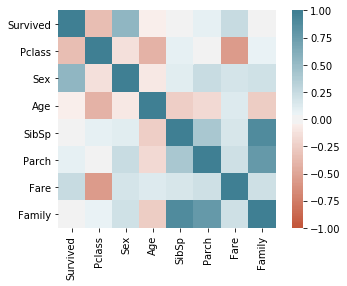

In [40]:
corr = train.corr()
sns.heatmap(corr, 
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20,220, n=200),
            square=True
)

In [41]:
train_df.groupby('Family')['Survived'].mean().sort_values(ascending=False)

Family
3     0.724138
2     0.578431
1     0.552795
6     0.333333
0     0.303538
4     0.200000
5     0.136364
10    0.000000
7     0.000000
Name: Survived, dtype: float64

#### Observation: 

After the plotting the correlation heatmap and grouping by the number of family member, we can see that the number of family numbers is not a significant factor for survival rate. Therefore, I decided to drop them from our feature collection as well as the numerical age and fare attributes.

In [42]:
train.drop(columns=['Age','SibSp','Parch','Fare','Family'], inplace=True)

In [43]:
test.drop(columns=['Age','SibSp','Parch','Fare'], inplace=True)

#### Visualize our current train and test sets

In [44]:
train.head()

,Survived,Pclass,Sex,Embarked,Title,Fare_,Age_
0,0,3,0,S,Mr,lowest fare,20 to 40
1,1,1,1,C,Mrs,highest fare,20 to 40
2,1,3,1,S,Miss,low fare,20 to 40
3,1,1,1,S,Mrs,highest fare,20 to 40
4,0,3,0,S,Mr,low fare,20 to 40


In [45]:
test.head()

,Pclass,Sex,Embarked,Title,Fare_,Age_
0,3,0,Q,Mr,lowest fare,20 to 40
1,3,1,S,Mrs,lowest fare,40 to 60
2,2,0,Q,Mr,low fare,over 60
3,3,0,S,Mr,low fare,20 to 40
4,3,1,S,Mrs,medium fare,20 to 40


Until now, we have all the features we need. Next thing to do is to create dummy variables for all the categorical features. We can firstly combine training set and testing set into one dataset, and then split them to keep their dummy variables same. 

In [46]:
categorical_features = ['Pclass', 'Embarked', 'Title', 'Fare_', 'Age_']
dataset = pd.concat(objs=[train, test], axis=0)
train_len = len(train)
dataset = pd.get_dummies(dataset, columns=categorical_features, drop_first=True)
train_dummies = dataset.iloc[:train_len]
test_dummies = dataset.iloc[train_len:].drop(columns='Survived')

In [47]:
train_dummies.head()

,Survived,Sex,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Fare__highest fare,Fare__low fare,Fare__lowest fare,Fare__medium fare,Age__20 to 40,Age__40 to 60,Age__below 10,Age__over 60
0,0.0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0
1,1.0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
2,1.0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0
3,1.0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0
4,0.0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0


In [48]:
test_dummies.head()

,Sex,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Fare__highest fare,Fare__low fare,Fare__lowest fare,Fare__medium fare,Age__20 to 40,Age__40 to 60,Age__below 10,Age__over 60
0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0
1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0
2,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
3,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0
4,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0


Until now, we have all the training and testing set prepared. Next we will train several models and use K-fold cross validation to validate our model. 

In [49]:
X = train_dummies.drop(columns='Survived')
y = train_dummies['Survived']

In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Logistic Regression (get the baseline model)

In [52]:
model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)
prediction = model_logreg.predict(X_test)
accuracy_score(y_test, prediction)

0.8135593220338984

### Support Vector Machine (change the kernel types to find the best one)

In [53]:
kernel_list = ['linear', 'poly', 'rbf']
for kernel in kernel_list:
    model_svm = SVC(kernel=kernel)
    model_svm.fit(X_train, y_train)
    prediction = model_svm.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    print(f'kernel: {kernel}, accuracy:{accuracy}')

kernel: linear, accuracy:0.8033898305084746
kernel: poly, accuracy:0.8135593220338984
kernel: rbf, accuracy:0.8067796610169492


In [54]:
model_svm = SVC(kernel='poly')
model_svm.fit(X_train, y_train)
prediction = model_svm.predict(X_test)
accuracy_score(y_test, prediction)

0.8135593220338984

### Naive Bayes Classifier

In [55]:
model_nbc = GaussianNB()
model_nbc.fit(X_train, y_train)
prediction = model_nbc.predict(X_test)
accuracy_score(y_test, prediction)

0.7932203389830509

### KNN (Use elbow method to determine the optimal k and leave-one-out CV to get the performance)

In [56]:
accuracy_list = []
loo = LeaveOneOut()
for i in range(1, 21):
    correct = 0
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        model_knn = KNeighborsClassifier(n_neighbors=i)
        model_knn.fit(X_train, y_train)
        prediction = model_knn.predict(X_test)
        correct += accuracy_score(y_test, prediction)
    accuracy = correct/891
    accuracy_list.append(accuracy)

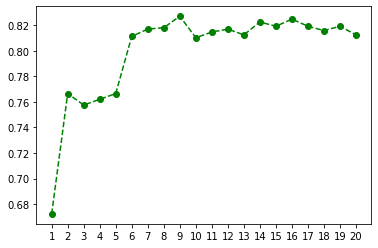

In [57]:
plt.plot(range(1,21), accuracy_list, 'go--')
plt.xticks(ticks=range(1,21), labels=range(1,21))
plt.show()

In [58]:
k = 9
model_knn = KNeighborsClassifier(n_neighbors=k)
model_knn.fit(X, y)
prediction = model_knn.predict(X)
accuracy_score(y, prediction)

0.8417508417508418

### Decision Tree Classifier (Gini Index and Information Gain)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [60]:
for criterion in ['gini', 'entropy']:
    model_dtc = DecisionTreeClassifier(criterion=criterion)
    model_dtc.fit(X_train, y_train)
    prediction = model_dtc.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    print(f'{criterion}: {accuracy}')

gini: 0.7728813559322034
entropy: 0.7728813559322034


### Random Forest Classifier (All feature model and using the top 6 features)

In [61]:
model_rfc = RandomForestClassifier(n_estimators=100)
model_rfc.fit(X_train, y_train)
prediction = model_rfc.predict(X_test)
print(accuracy_score(y_test, prediction))

0.7898305084745763


In [62]:
feature_imp = pd.Series(data = model_rfc.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp

Sex                   0.188709
Title_Mr              0.150103
Pclass_3              0.124745
Title_Miss            0.061447
Embarked_S            0.060364
Title_Mrs             0.055659
Fare__medium fare     0.050455
Pclass_2              0.047386
Age__20 to 40         0.047217
Fare__highest fare    0.046511
Age__below 10         0.040577
Fare__low fare        0.031043
Fare__lowest fare     0.030396
Embarked_Q            0.023561
Age__40 to 60         0.020450
Title_Others          0.014457
Age__over 60          0.006920
dtype: float64

In [63]:
top6_features = ['Sex', 'Title_Mr', 'Pclass_3', 'Embarked_S','Title_Miss', 'Title_Mrs']
X_top6, X_test_top6 = X_train[top6_features], X_test[top6_features]
model_rfc = RandomForestClassifier(n_estimators=100)
model_rfc.fit(X_top6, y_train)
prediction = model_rfc.predict(X_test_top6)
print(accuracy_score(y_test, prediction))

0.7932203389830509


### XGBoost

In [64]:
model_xgb= xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.6, learning_rate = 0.1,
                        max_depth = 3, gamma=0.9, n_estimators = 60)
model_xgb.fit(X_train, y_train)
prediction = model_xgb.predict(X_test)
accuracy_score(y_test, prediction)

0.8135593220338984

#### Observations: 

From the above models, we can see KNN and XGBoost gave us the best result. Therefore, I will try to apply them to the final test set.

### Neural Network Classifier (Add dropout layer to avoid overfitting)

In [66]:
import torch
from torch import nn, optim
import torch.nn.functional as F

In [67]:
X_train_tensor = torch.from_numpy(X_train.to_numpy()).float()
y_train_tensor = torch.from_numpy(y_train.to_numpy()).float()

X_test_tensor = torch.from_numpy(X_test.to_numpy()).float()
y_test_tensor = torch.from_numpy(y_test.to_numpy()).float()

print(X_train_tensor.size(), y_train_tensor.size())
print(X_test_tensor.size(), y_test_tensor.size())

torch.Size([596, 17]) torch.Size([596])
torch.Size([295, 17]) torch.Size([295])


In [70]:
class Net(nn.Module):
    def __init__(self, n_features):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_features, 14)
        self.fc2 = nn.Dropout(0.4)
        self.fc3 = nn.Linear(14, 8)
        self.fc4 = nn.Dropout(0.4)
        self.fc5 = nn.Linear(8, 1)
        
    def forward(self, x):
        x = self.fc2(F.relu(self.fc1(x)))
        x = self.fc4(F.relu(self.fc3(x)))
        return F.sigmoid(self.fc5(x))

net = Net(X_train_tensor.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [71]:
def calculate_accuracy(y_true, y_pred):
    predicted = y_pred.ge(.5).view(-1)
    return (y_true == predicted).sum().float() / len(y_true)

In [72]:
train_accuracy = []
test_accuracy = []
for epoch in range(5001):
    y_pred = net(X_train_tensor)
    train_loss = criterion(y_pred, y_train_tensor)
    if epoch % 200 == 0:
        train_acc = calculate_accuracy(y_train_tensor, y_pred)
        y_test_pred = net(X_test_tensor)
        test_loss = criterion(y_test_pred, y_test_tensor)
        test_acc = calculate_accuracy(y_test_tensor, y_test_pred)
        train_accuracy.append(train_acc)
        test_accuracy.append(test_acc)
        print(
        f'''epoch {epoch}
        Train set - loss: {train_loss}, accuracy: {train_acc}
        Test set - loss: {test_loss}, accuracy: {test_acc}
        ''')
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

C:\Anaconda\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Anaconda\lib\site-packages\torch\nn\modules\loss.py:498: UserWarning: Using a target size (torch.Size([596])) that is different to the input size (torch.Size([596, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
C:\Anaconda\lib\site-packages\torch\nn\modules\loss.py:498: UserWarning: Using a target size (torch.Size([295])) that is different to the input size (torch.Size([295, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


epoch 0
        Train set - loss: 0.7254443764686584, accuracy: 0.40771812200546265
        Test set - loss: 0.7194430828094482, accuracy: 0.4203389883041382
        
epoch 200
        Train set - loss: 0.5187845230102539, accuracy: 0.7684563994407654
        Test set - loss: 0.5259839296340942, accuracy: 0.7694915533065796
        
epoch 400
        Train set - loss: 0.44216227531433105, accuracy: 0.8171141147613525
        Test set - loss: 0.49154409766197205, accuracy: 0.7762711644172668
        
epoch 600
        Train set - loss: 0.4479677975177765, accuracy: 0.8204697966575623
        Test set - loss: 0.492790549993515, accuracy: 0.810169517993927
        
epoch 800
        Train set - loss: 0.42199409008026123, accuracy: 0.823825478553772
        Test set - loss: 0.5059802532196045, accuracy: 0.7762711644172668
        
epoch 1000
        Train set - loss: 0.4063386023044586, accuracy: 0.8389261960983276
        Test set - loss: 0.5260711908340454, accuracy: 0.7728813290596008
 

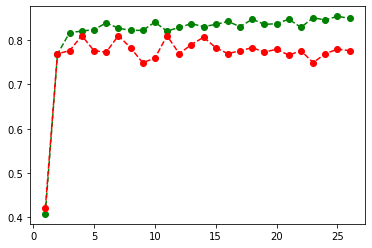

In [73]:
plt.plot(range(1,27), train_accuracy, 'go--')
plt.plot(range(1,27), test_accuracy,'ro--')
#plt.xticks(ticks=range(1,21), labels=range(1,21))
plt.show()

In [74]:
final_input = torch.Tensor(test_dummies.to_numpy())
final_output = net(final_input).squeeze() \
            .ge(0.5).numpy() \
            .astype(int)

C:\Anaconda\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [75]:
#final_output = model_xgb.predict(test_dummies).astype(int)
submission = pd.DataFrame({
        "PassengerId": sample_df["PassengerId"],
        "Survived": final_output
    })
submission.to_csv('submission.csv', index=False)